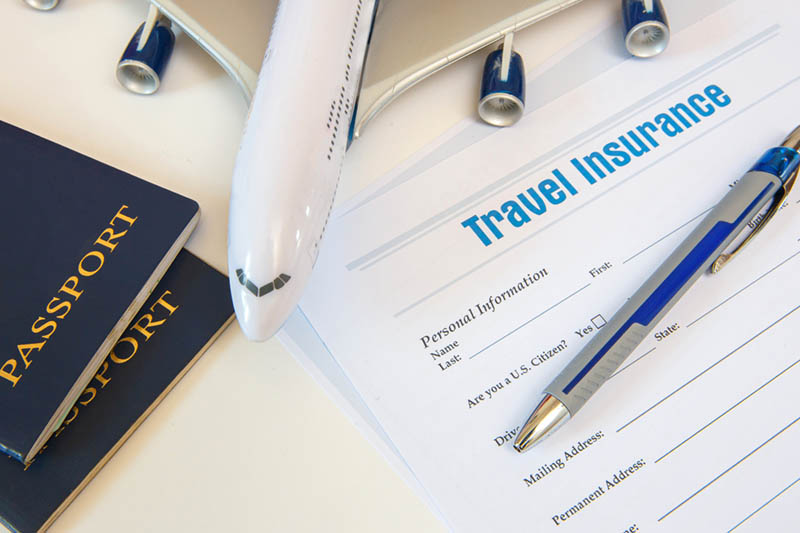

In [2]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay  # Perubahan dari plot_roc_curve
                                                                            
# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


# 1. Business Understanding

## 1.1 Latar Belakang


Asuransi perjalanan berperan penting dalam melindungi pelanggan dari berbagai risiko yang dapat terjadi selama perjalanan, seperti pembatalan perjalanan, kehilangan bagasi, atau kecelakaan. Dalam industri ini, perusahaan asuransi harus memastikan bahwa mereka memiliki cadangan dana yang cukup untuk membayar klaim tanpa mengalokasikan dana secara berlebihan, agar tetap menjaga efisiensi modal.

Saat ini, metode perhitungan cadangan premi masih banyak mengandalkan pendekatan berbasis aturan yang menggunakan data historis untuk memperkirakan besaran cadangan yang dibutuhkan. Meskipun pendekatan ini telah digunakan secara luas, metode ini belum tentu mampu menangkap pola klaim yang lebih kompleks, terutama dalam kondisi pasar yang dinamis dan jumlah klaim yang terus berkembang. Jika cadangan yang dialokasikan terlalu kecil, perusahaan dapat mengalami kesulitan dalam membayar klaim yang valid, sementara alokasi dana yang berlebihan dapat mengurangi efisiensi keuangan.

## 1.2 Problem Statement


Perusahaan asuransi perlu membangun model machine learning untuk memprediksi klaim dengan lebih akurat, sehingga dapat menyiapkan cadangan dana yang cukup tanpa mengalokasikan dana secara berlebihan. Pendekatan ini dikembangkan untuk memberikan hasil yang lebih baik dibandingkan metode yang telah ada, dengan mampu menangkap pola klaim yang lebih kompleks dan meningkatkan ketepatan perhitungan cadangan premi.

## 1.3 Goal


Perusahaan asuransi perjalanan perlu membangun model machine learning untuk memprediksi klaim dengan lebih akurat, sehingga dapat menyiapkan cadangan dana yang cukup tanpa mengalokasikan dana secara berlebihan. Pendekatan ini dikembangkan untuk memberikan hasil yang lebih baik dibandingkan metode yang telah ada, dengan mampu menangkap pola klaim yang lebih kompleks dan meningkatkan ketepatan perhitungan cadangan premi.

## 1.4 Analytical Approach

Proses data preprocessing dilakukan dengan Import Data, Data CLeaning, Exploratory Data Analysis, dan mengonversi variabel kategori. Selanjutnya, fitur yang paling relevan dipilih sebelum tahap modeling, di mana model terbaik seperti Random Forest, Logistic Regression, Decision Tree, dan XGBoost digunakan untuk memperoleh hasil yang optimal.

## 1.5 Metric Evaluation

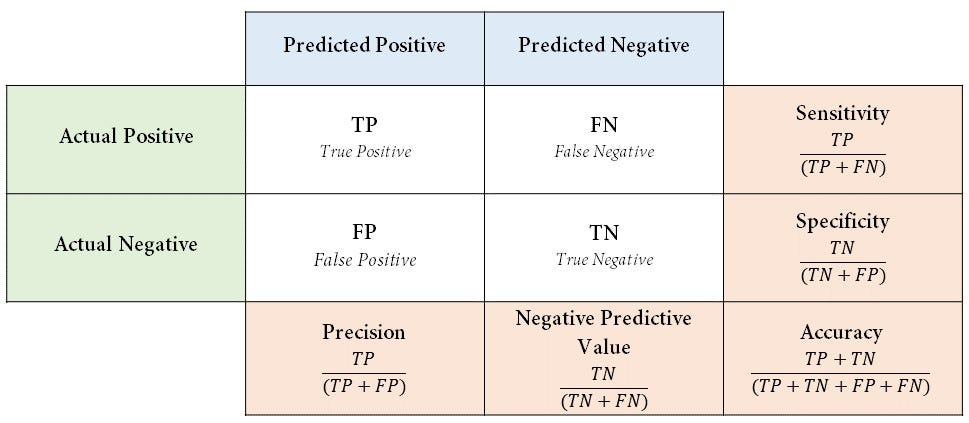

**Tujuan Utama:**

Meminimalkan false negative dalam identifikasi klaim untuk meningkatkan akurasi prediksi dan pengelolaan risiko secara lebih efektif.  


**Jenis Kesalahan Model:**  

1. Type 1 Error (False Positive)  
   Model memprediksi klaim akan terjadi, padahal tidak. Hal ini menyebabkan alokasi sumber daya yang tidak efisien.  

2. Type 2 Error (False Negative)  
   Model memprediksi klaim tidak terjadi, padahal sebenarnya terjadi. Kesalahan ini berisiko menyebabkan klaim yang seharusnya dibayar menjadi tidak terdeteksi, sehingga meningkatkan potensi kerugian finansial.  

**Metrik Utama:**

F2-score digunakan sebagai metrik utama karena lebih menekankan pada pengurangan false negative tanpa secara berlebihan meningkatkan false positive. Dengan pendekatan ini, model dapat lebih efektif dalam menangkap klaim yang valid dan mengurangi risiko kesalahan dalam pengelolaan klaim.

# 2. Data Understanding


## 2.1 Data Understanding

In [17]:
df = pd.read_csv("data_travel_insurance.csv")
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


| Fitur                   | Deskripsi |
|-------------------------|-------------|
| **Agency**              | Perusahaan mitra yang menjual polis asuransi perjalanan |
| **Agency Type**         | Kategori dari agency berdasarkan jenis bisnis |
| **Distribution Channel** | Saluran distribusi agen asuransi perjalanan. |
| **Product Name**        | Nama produk asuransi perjalanan. |
| **Gender**              | Jenis kelamin pemegang polis. |
| **Duration**            | Durasi perjalanan dalam hitungan hari. |
| **Destination**         | Destinasi negara perjalanan. |
| **Net Sales**           | Jumlah penjualan polis asuransi perjalanan. |
| **Commission (in value)** | Komisi yang diterima oleh agen asuransi perjalanan. |
| **Age**                 | Usia pemegang polis. |
| **Claim**               | Status klaim asuransi. |

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


Kita akan gunakan `Claim` deposit sebagai label yang akan diprediksi, sedangkan kolom lainnya akan dijadikan sebagai fitur untuk memprediksi label.

In [21]:
# Menghitung jumlah klaim Yes dan No
claim_counts = df['Claim'].value_counts()

# Menghitung rasio klaim
claim_ratio = claim_counts / claim_counts.sum()

# Menampilkan hasil
print(claim_ratio)

Claim
No     0.984727
Yes    0.015273
Name: count, dtype: float64


# 3. Data Preparation

## 3.1 Data Types

In [24]:
display(df.head())
df.info()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


Kolom `Claim` awalnya berupa nilai kategorikal dengan format **"Yes"** dan **"No"**, yang perlu dikonversi menjadi numerik agar dapat digunakan dalam pemodelan machine learning.  

In [26]:
#encode deposit to numeric
df["Claim"] = np.where(df["Claim"]=="No",0,1)

In [27]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,0


## 3.2 Handling Missing Value

In [29]:
display(df.isna().sum())

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [30]:
# Menghitung persentase missing values
missing_percentage = ((df.isna().sum() / len(df)) * 100).round(2)
missing_percentage

Agency                   0.00
Agency Type              0.00
Distribution Channel     0.00
Product Name             0.00
Gender                  71.39
Duration                 0.00
Destination              0.00
Net Sales                0.00
Commision (in value)     0.00
Age                      0.00
Claim                    0.00
dtype: float64

Terlihat bahwa kolom gender memiliki 71.39% missing value maka dari itu akan kita drop saja agar tidak mengganggu model

In [32]:
# Drop kolom 'Gender' dari DataFrame
df.drop(columns=['Gender'], inplace=True)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


## 3.3 Handling Duplicate

In [34]:
#Memeriksa jumlah data duplikat pada data Train
display(df.duplicated().sum())

5004

Terdapat data duplikat pada data train, maka data tersebut akan di drop

In [36]:
#Menghapus data duplikat pada data Train
df = df.drop_duplicates()
display(df.duplicated().sum())

0

## 3.4 Data Range Constraint

In [38]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,39324.000000,39324.00000,39324.000000,39324.000000,39324.000000
mean,52.275989,42.20253,10.386189,39.833054,0.017114
std,113.404932,49.70403,20.345275,13.225494,0.129699
min,-1.000000,-357.50000,0.000000,0.000000,0.000000
25%,11.000000,19.00000,0.000000,35.000000,0.000000
50%,25.000000,29.00000,0.000000,36.000000,0.000000
75%,57.000000,50.00000,11.880000,44.000000,0.000000
max,4881.000000,810.00000,283.500000,118.000000,1.000000


Dilihat bahwa terdapat terdap usia pemegang polis hingga umur 118 pada fitur `age`. Berdasarkan data yang didapat dari https://www.comparetravelinsurance.com , akan diasumsikan bahwa maksimal umur penerima asuransi berada di bawah umur 100 tahun. Maka dari itu akan dilakukan penanganan pada pemegang polis dengan umur di atas 99 tahun.

In [40]:
 df[df["Age"] > 99]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,0
105,JZI,Airlines,Offline,Basic Plan,16,INDONESIA,37.0,12.95,118,0
363,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,0
373,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,0
727,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,0
...,...,...,...,...,...,...,...,...,...,...
43838,JWT,Airlines,Online,Value Plan,67,INDIA,200.0,80.00,118,0
43856,JWT,Airlines,Online,Value Plan,10,INDIA,50.0,20.00,118,1
43928,JWT,Airlines,Online,Value Plan,83,INDIA,180.0,72.00,118,0
44089,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,0


In [41]:
df = df[df["Age"] <= 99]

In [42]:
 df[df["Age"] > 99]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


Terdapat juga bahwa ada pemegang polis yang memeiliki duration hingga 4881 hari pada fitur `Duration`. berdasarkan pemahaman industri asuransi, travel insurance seringkali tidak lebih dari 1 tahun yang dimana hanya memiliki durasi beberapa bulan saja. Namun, tetap ada perusahaan asuransi yang memeiliki kebijakan coverage hingga 365 hari sebagaimana terdapat pada web resmi perusahaan asuransi allianz (www.allianz.at). Maka dari itu, data dengan `duration` > 365.

In [44]:
 df[df["Duration"] > 365]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
13,C2B,Airlines,Online,Annual Silver Plan,376,SINGAPORE,252.85,63.21,43,1
50,LWC,Travel Agency,Online,Annual Travel Protect Gold,370,CHINA,204.60,132.99,39,1
53,C2B,Airlines,Online,Annual Silver Plan,366,SINGAPORE,216.00,54.00,37,0
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,0
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,430,AUSTRALIA,-59.40,35.64,41,0
...,...,...,...,...,...,...,...,...,...,...
44142,C2B,Airlines,Online,Annual Silver Plan,400,SINGAPORE,252.85,63.21,30,0
44210,C2B,Airlines,Online,Annual Gold Plan,378,SINGAPORE,333.00,83.25,47,0
44217,C2B,Airlines,Online,Annual Silver Plan,382,SINGAPORE,216.00,54.00,38,0
44224,C2B,Airlines,Online,Annual Silver Plan,390,SINGAPORE,301.00,75.25,48,1


In [45]:
df =  df[df["Duration"] <= 365]

In [46]:
 df[df["Duration"] > 365]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim


In [47]:
df.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,38032.000000,38032.000000,38032.000000,38032.000000,38032.000000
mean,43.364036,37.919894,8.859404,38.928139,0.015119
std,55.944153,39.473478,17.044066,10.401858,0.122027
min,0.000000,-357.500000,0.000000,0.000000,0.000000
25%,10.000000,18.500000,0.000000,35.000000,0.000000
50%,24.000000,28.000000,0.000000,36.000000,0.000000
75%,53.000000,49.000000,10.500000,44.000000,0.000000
max,365.000000,682.000000,262.760000,88.000000,1.000000


## 3.5 Handling outlier

In [49]:
#Melihat summary descriptive data train dan test
display(df.describe())

,Duration,Net Sales,Commision (in value),Age,Claim
count,38032.000000,38032.000000,38032.000000,38032.000000,38032.000000
mean,43.364036,37.919894,8.859404,38.928139,0.015119
std,55.944153,39.473478,17.044066,10.401858,0.122027
min,0.000000,-357.500000,0.000000,0.000000,0.000000
25%,10.000000,18.500000,0.000000,35.000000,0.000000
50%,24.000000,28.000000,0.000000,36.000000,0.000000
75%,53.000000,49.000000,10.500000,44.000000,0.000000
max,365.000000,682.000000,262.760000,88.000000,1.000000


Terlihat bahwa beberapa fitur memiliki standar deviasi yang cukup besar, maka dari itu akan dilakukan pengecekan menggunakan boxplot bagi fitur-fitur yang ada dan juga akan dilakukan berdasarkan iqr (1,5 dan 3).

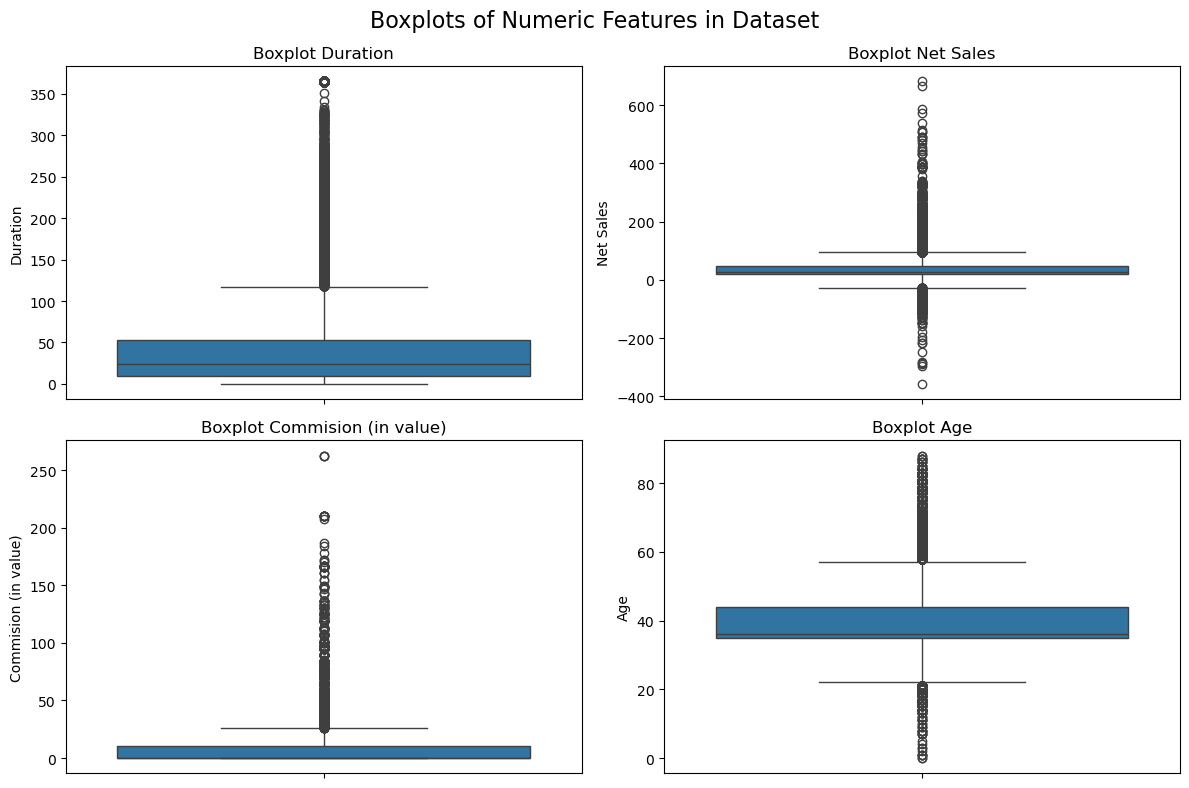

In [51]:
# creating boxplots for numeric features in train data
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(df["Duration"])
plt.title("Boxplot Duration")

plt.subplot(2, 2, 2)
sns.boxplot(df["Net Sales"])
plt.title("Boxplot Net Sales")

plt.subplot(2, 2, 3)
sns.boxplot(df["Commision (in value)"])
plt.title("Boxplot Commision (in value)")

plt.subplot(2, 2, 4)
sns.boxplot(df["Age"])
plt.title("Boxplot Age")

plt.suptitle("Boxplots of Numeric Features in Dataset", fontsize=16)

plt.tight_layout()
plt.show()


In [52]:
# using iqr 1.5
columns = ["Duration", "Net Sales", "Commision (in value)","Age"]
list_Q1 = []
list_Q3 = []
iqr_list= []
list_l_bound = []
list_u_bound = []
length_list = []
percentage_n_list =[]

for col in columns:
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    u_bound = Q3 + 1.5*IQR # IQR 1.5x
    l_bound = Q1 - 1.5*IQR # IQR 1.5x
    length = len(df[(df[col] < l_bound) | (df[col] > u_bound) ])
    percentage_n = round(length/len(df),2)
    list_Q1.append(Q1)
    list_Q3.append(Q3)
    iqr_list.append(IQR)
    list_l_bound.append(l_bound)
    list_u_bound.append(u_bound)
    length_list.append(length)
    percentage_n_list.append(percentage_n)
df_iqr = pd.DataFrame({
    "columns":columns,
    "Q1":list_Q1,
    "Q3":list_Q3,
    "IQR":iqr_list,
    "Lower Bound":list_l_bound,
    "Upper Bound":list_u_bound,
    "n": length_list,
    "n(%)": percentage_n_list
})

df_iqr

,columns,Q1,Q3,IQR,Lower Bound,Upper Bound,n,n(%)
0,Duration,10.0,53.0,43.0,-54.50,117.50,2878,0.08
1,Net Sales,18.5,49.0,30.5,-27.25,94.75,2765,0.07
2,Commision (in value),0.0,10.5,10.5,-15.75,26.25,3877,0.10
3,Age,35.0,44.0,9.0,21.50,57.50,3188,0.08


In [53]:
# using iqr 3
columns = ["Duration", "Net Sales", "Commision (in value)", "Age"]
list_Q1 = []
list_Q3 = []
iqr_list= []
list_l_bound = []
list_u_bound = []
length_list = []
percentage_n_list =[]

for col in columns:
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    u_bound = Q3 + 3*IQR 
    l_bound = Q1 - 3*IQR 
    length = len(df[(df[col] < l_bound) | (df[col] > u_bound) ])
    percentage_n = round(length/len(df),2)
    list_Q1.append(Q1)
    list_Q3.append(Q3)
    iqr_list.append(IQR)
    list_l_bound.append(l_bound)
    list_u_bound.append(u_bound)
    length_list.append(length)
    percentage_n_list.append(percentage_n)
df_iqr = pd.DataFrame({
    "columns":columns,
    "Q1":list_Q1,
    "Q3":list_Q3,
    "IQR":iqr_list,
    "Lower Bound":list_l_bound,
    "Upper Bound":list_u_bound,
    "n": length_list,
    "n(%)": percentage_n_list
})

df_iqr

,columns,Q1,Q3,IQR,Lower Bound,Upper Bound,n,n(%)
0,Duration,10.0,53.0,43.0,-119.0,182.0,1265,0.03
1,Net Sales,18.5,49.0,30.5,-73.0,140.5,780,0.02
2,Commision (in value),0.0,10.5,10.5,-31.5,42.0,1820,0.05
3,Age,35.0,44.0,9.0,8.0,71.0,356,0.01


Dapat dilihat bahwa beberapa data memang memiliki outlier, namun dikarenakan rentangnya masih masuk akal maka tidak ada penanganan pada fitur outlier.

## 3.6 Normality Test

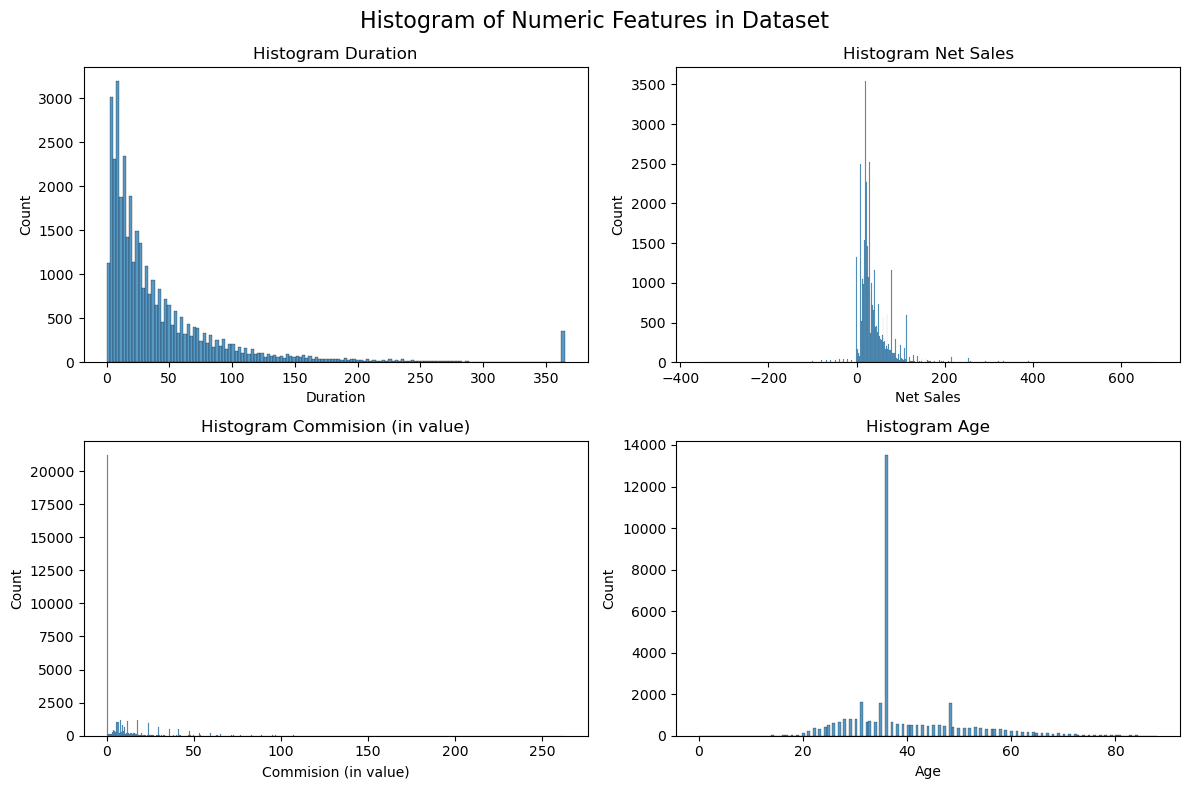

In [56]:
# creating boxplots for numeric features in train data
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df["Duration"])
plt.title("Histogram Duration")

plt.subplot(2, 2, 2)
sns.histplot(df["Net Sales"])
plt.title("Histogram Net Sales")

plt.subplot(2, 2, 3)
sns.histplot(df["Commision (in value)"])
plt.title("Histogram Commision (in value)")

plt.subplot(2, 2, 4)
sns.histplot(df["Age"])
plt.title("Histogram Age")

plt.suptitle("Histogram of Numeric Features in Dataset", fontsize=16)

plt.tight_layout()
plt.show()


In [57]:
from scipy.stats import normaltest
from scipy.stats import shapiro


# Apply normaltest to each column and collect the p-values
normality_results = df.select_dtypes(include='number').apply(lambda col: shapiro(col.dropna())[1]).reset_index()

# Rename columns
normality_results.columns = ['Column', 'p-value']

# Print the result
normality_results

,Column,p-value
0,Duration,1.153997e-122
1,Net Sales,7.246704e-117
2,Commision (in value),1.620640e-129
3,Age,2.056930e-92
4,Claim,3.459448e-152


Terlihat semua data numerik tidak terdistribusi secara normal, karena hasil uji normalitas menunjukkan bahwa semua fitur memiliki p-value di bawah 5%. Oleh karena itu, dalam pipeline model, semua fitur akan mengalami robust scaling untuk memastikan model lebih konsisten terhadap data yang mengandung outlier.

In [59]:
display(df.head())
df.describe()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


,Duration,Net Sales,Commision (in value),Age,Claim
count,38032.000000,38032.000000,38032.000000,38032.000000,38032.000000
mean,43.364036,37.919894,8.859404,38.928139,0.015119
std,55.944153,39.473478,17.044066,10.401858,0.122027
min,0.000000,-357.500000,0.000000,0.000000,0.000000
25%,10.000000,18.500000,0.000000,35.000000,0.000000
50%,24.000000,28.000000,0.000000,36.000000,0.000000
75%,53.000000,49.000000,10.500000,44.000000,0.000000
max,365.000000,682.000000,262.760000,88.000000,1.000000


## 3.7 Handling Categorical Data

Akan dilakukan penyesuaian data kategorikal

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38032 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                38032 non-null  object 
 1   Agency Type           38032 non-null  object 
 2   Distribution Channel  38032 non-null  object 
 3   Product Name          38032 non-null  object 
 4   Duration              38032 non-null  int64  
 5   Destination           38032 non-null  object 
 6   Net Sales             38032 non-null  float64
 7   Commision (in value)  38032 non-null  float64
 8   Age                   38032 non-null  int64  
 9   Claim                 38032 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 3.0+ MB


In [63]:
pd.set_option('display.max_colwidth', None)

columns = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']
values = []
nunique_list = []
for i in columns:
    value = df[i].unique()
    nunique = df[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

,columns,values,nunique
0,Agency,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, RAB, KML, SSI, TST, ADM, CCR, CBH, TTW]",15
1,Agency Type,"[Airlines, Travel Agency]",2
2,Distribution Channel,"[Online, Offline]",2
3,Product Name,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Gold Plan, Premier Plan, Single Trip Travel Protect Platinum, Annual Gold Plan, Annual Travel Protect Gold, Annual Travel Protect Silver, Spouse or Parents Comprehensive Plan, Individual Comprehensive Plan, Annual Travel Protect Platinum, Travel Cruise Protect Family, Child Comprehensive Plan]",26
4,Destination,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]",136


In [64]:
for i in df.select_dtypes(object).columns:
    display(pd.DataFrame(df[i].value_counts()))

,count
Agency,
EPX,20961
CWT,5724
C2B,4631
JZI,4185
SSI,691
RAB,440
LWC,330
TST,329
KML,229


,count
Agency Type,
Travel Agency,27893
Airlines,10139


,count
Distribution Channel,
Online,37407
Offline,625


,count
Product Name,
Cancellation Plan,11007
2 way Comprehensive Plan,8109
Rental Vehicle Excess Insurance,5724
Basic Plan,3599
Bronze Plan,2631
1 way Comprehensive Plan,1845
Silver Plan,1480
Value Plan,1223
Ticket Protector,691


,count
Destination,
SINGAPORE,7359
THAILAND,3636
MALAYSIA,3154
CHINA,2890
AUSTRALIA,2447
...,...
LATVIA,1
JAMAICA,1
FRENCH POLYNESIA,1


In [65]:
df["Destination"].unique()

array(['SINGAPORE', 'MALAYSIA', 'INDIA', 'UNITED STATES',
       'KOREA, REPUBLIC OF', 'THAILAND', 'GERMANY', 'JAPAN', 'INDONESIA',
       'VIET NAM', 'AUSTRALIA', 'FINLAND', 'UNITED KINGDOM', 'SRI LANKA',
       'SPAIN', 'HONG KONG', 'MACAO', 'CHINA', 'UNITED ARAB EMIRATES',
       'IRAN, ISLAMIC REPUBLIC OF', 'TAIWAN, PROVINCE OF CHINA', 'POLAND',
       'CANADA', 'OMAN', 'PHILIPPINES', 'GREECE', 'BELGIUM', 'TURKEY',
       'BRUNEI DARUSSALAM', 'DENMARK', 'SWITZERLAND', 'NETHERLANDS',
       'SWEDEN', 'MYANMAR', 'KENYA', 'CZECH REPUBLIC', 'FRANCE',
       'RUSSIAN FEDERATION', 'PAKISTAN', 'ARGENTINA',
       'TANZANIA, UNITED REPUBLIC OF', 'SERBIA', 'ITALY', 'CROATIA',
       'NEW ZEALAND', 'PERU', 'MONGOLIA', 'CAMBODIA', 'QATAR', 'NORWAY',
       'LUXEMBOURG', 'MALTA', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'ISRAEL', 'SAUDI ARABIA', 'AUSTRIA', 'PORTUGAL', 'NEPAL',
       'UKRAINE', 'ESTONIA', 'ICELAND', 'BRAZIL', 'MEXICO',
       'CAYMAN ISLANDS', 'PANAMA', 'BANGLADESH', 'TURKME

Tidak ada keanehan terhadap data kategorikal.

## Multicolinearity

Akan dilakukan pengecekan Multicolinearity pada fitur  untuk mengetahui apakah p

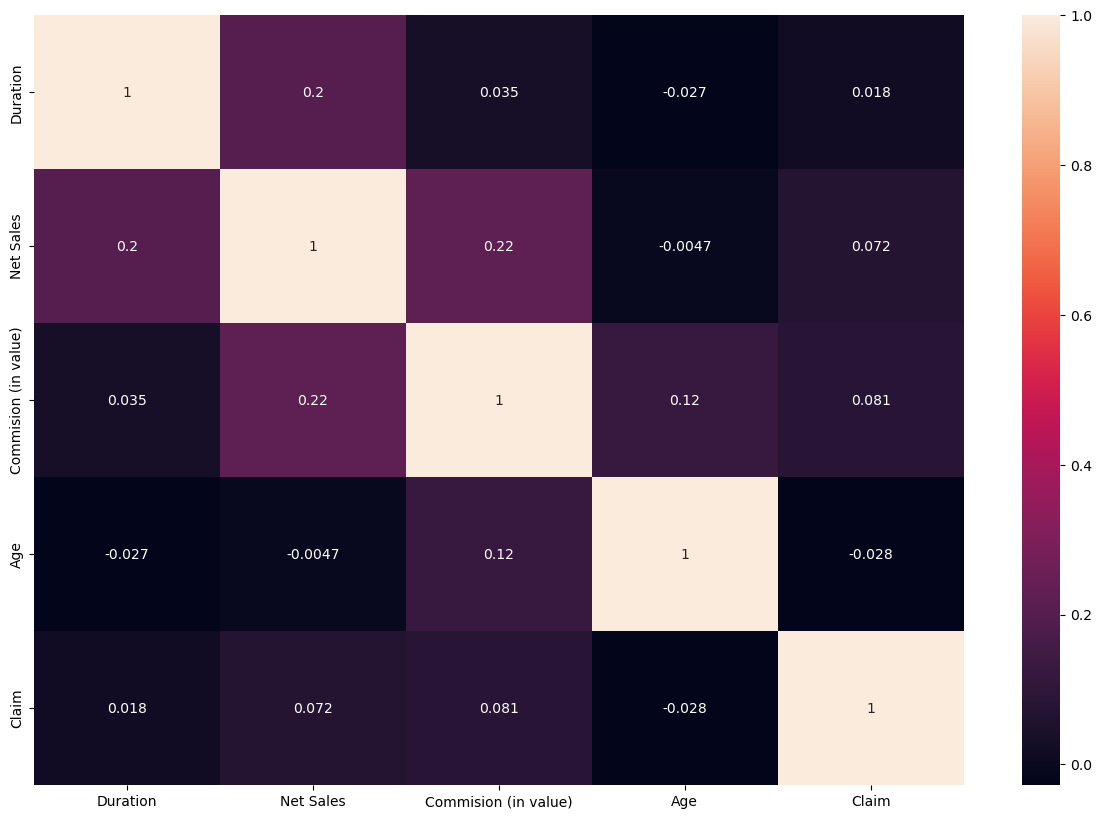

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(method='spearman'),annot=True)
plt.show()

In [70]:
dfcorr=df.select_dtypes(include='number')
corrMatrix=dfcorr.corr(method='spearman')
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][corrMatrix[col] >= 0.6 ].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)

result


[['Duration', 'Duration'],
 ['Net Sales', 'Net Sales'],
 ['Commision (in value)', 'Commision (in value)'],
 ['Age', 'Age'],
 ['Claim', 'Claim']]

Terlihat tidak terdapat data yang memiliki multikolinearitas yang tinggi pada kolom numerik.

# 4. Modelling

Pada tahap ini, data train digunakan untuk melatih model, yang kemudian diterapkan untuk memprediksi label pada data test.

## 4.1 Split Data

Dataset yang disediakan berisi 44328 data. Kita akan membagi data tersebut menjadi 2 data
1. 80% data akan menjadi data train untuk melatih model
2. 20% data akan menjadi data test untuk mengevaluasi model

In [76]:
#memisahkan X dan y untuk dilakukan train_test_split
X = df.drop("Claim",axis=1)
y = df["Claim"]

Kemudian kita akan mengasumsikan 20% data dari dataset akan menjadi data test yang berfungsi untuk mengevaluasi performa model, sedangkan 80% dari dataset akan menjadi data train yang berfungsi untuk melatih model.



In [78]:
#Memisahkan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
display(X_train.shape,X_test.shape)

(30425, 9)

(7607, 9)

Akan dilakukan modeling tuning pada 4 opsi model machine learning yang berupa:

1. Random forest classifier
2. Decision tree classifier
3. Logistic regression
4. Gradient Boosting Classifier

## 4.2 Preprocessing

Dalam proses Preprocessing, dilakukan beberapa langkah utama. Pada tahap ColumnTransformer, OneHotEncoder dan BinaryEncoder digunakan untuk mengubah fitur kategorikal menjadi numerik, sedangkan RobustScaler diterapkan pada fitur numerik untuk mengurangi dampak outlier.  


In [82]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,FunctionTransformer
import category_encoders as ce #untuk binary encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.feature_selection import SelectPercentile, SelectKBest,f_regression, f_classif
from sklearn.metrics import RocCurveDisplay
from sklearn.impute import SimpleImputer
import time

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

# Fitur kategorikal
categorical_features = ['Agency', 'Agency Type', 'Product Name', 'Distribution Channel']
binary_feature = ['Destination']  # Menggunakan BinaryEncoder

# Preprocessing untuk fitur kategorikal (OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Tambahkan sparse_output=False untuk DataFrame
])

# Preprocessing untuk fitur numerik (RobustScaler)
numeric_features = ["Duration", "Net Sales", "Commision (in value)", "Age"]
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# Preprocessing untuk Destination (BinaryEncoder)
binary_transformer = Pipeline(steps=[
    ('binary', BinaryEncoder(return_df=True))  # return_df=True untuk menghindari masalah format
])

# Menggabungkan semua preprocessing dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', binary_transformer, binary_feature)
    ]
)

preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['Duration', 'Net Sales',
                                  'Commision (in value)', 'Age']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Agency', 'Agency Type', 'Product Name',
                                  'Distribution Channel']),
                                ('binary',
                                 Pipeline(steps=[('binary', BinaryEncoder())]),
                                 ['Destination'])])

## 4.3 Default Model

Setelah dilakukan Preprocessing, akan dilakukan modelling untuk mengevaluasi beberapa metrik, yaitu precision, recall, f1-Score, support, dan f2-Score. Fokus utama dalam analisis ini adalah f2-Score.  

- Precision mengukur proporsi prediksi positif yang benar dibandingkan dengan total prediksi positif.  
- Recall menunjukkan seberapa banyak kasus positif yang benar-benar terdeteksi dibandingkan dengan seluruh kasus positif yang ada.  
- F1-Score merupakan rata-rata harmonis dari precision dan recall, memberikan keseimbangan antara keduanya.  
- F2-Score adalah varian dari F1-Score yang lebih menitikberatkan pada recall dibandingkan precision.  

Model yang akan dibandingkan dalam analisis ini mencakup Logistic Regression, Decision Tree, Random Forest, XGBoost.


Model dengan performa terbaik akan dipilih berdasarkan F2-score dan digunakan untuk memprediksi nilai pada data X_test. Hasil prediksi ini akan menjadi acuan awal untuk mengevaluasi performa model sebelum dilakukan hyperparameter tuning pada tahap selanjutnya.

In [87]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import GridSearchCV
import time

# Daftar metode resampling yang ingin diuji
resampling_methods = {
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy=0.5, random_state=42),
    "SMOTE": SMOTE(sampling_strategy=0.5, random_state=42),
    "ADASYN": ADASYN(sampling_strategy=0.5, random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(sampling_strategy=0.5, random_state=42)
}

# Parameter grid untuk GridSearchCV
param_grid = [
    {
        'classifier': [
            RandomForestClassifier(random_state=2020),
            DecisionTreeClassifier(random_state=2020),
            LogisticRegression(random_state=42),
            XGBClassifier(random_state=2020)
        ],
    },
]

# Gunakan F2-score sebagai scoring metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Looping melalui setiap metode resampling
for method_name, resampler in resampling_methods.items():
    print(f"\n🔹 Running GridSearchCV ...\n")

    # Definisi pipeline dengan metode resampling saat ini
    pipeline = ImbPipeline(steps=[
        ("preprocessor", preprocessor),
        # ('resampling', resampler),  # Gunakan metode resampling yang sedang diuji
        ('classifier', RandomForestClassifier())  # Placeholder untuk classifier
    ])

    # Buat GridSearchCV dengan pipeline
    gscvdefault = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring=f2_scorer, error_score="raise")

    # Measure the fitting time
    start_time = time.time()

    # Fit GridSearchCV ke data
    gscvdefault.fit(X_train, y_train)

    end_time = time.time()
    fitting_time = end_time - start_time

    print(f"✅ {method_name} selesai! Fitting time: {fitting_time:.2f} seconds\n")



🔹 Running GridSearchCV ...

✅ RandomUnderSampler selesai! Fitting time: 21.00 seconds


🔹 Running GridSearchCV ...

✅ SMOTE selesai! Fitting time: 9.58 seconds


🔹 Running GridSearchCV ...

✅ ADASYN selesai! Fitting time: 9.23 seconds


🔹 Running GridSearchCV ...

✅ BorderlineSMOTE selesai! Fitting time: 9.47 seconds



In [88]:
best_model = gscvdefault.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Agency', 'Agency Type',
                                                   'Product Name',
                                                   'Distribution Channel']),
                                                 ('binary',
                                                  Pipeline(steps=[('binary',
                                                                   BinaryEncoder())]),
                                                  ['Destination'])])),
                ('classifier', DecisionTreeClassifier(random_state=2020))])

In [89]:
pd.DataFrame(gscvdefault.cv_results_).sort_values("rank_test_score")


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.835139,0.056580,0.113120,0.044591,DecisionTreeClassifier(random_state=2020),{'classifier': DecisionTreeClassifier(random_s...,0.052192,0.070994,0.042017,0.010000,0.059880,0.047017,0.020796,1
0,8.186690,0.517160,0.279491,0.071325,RandomForestClassifier(random_state=2020),{'classifier': RandomForestClassifier(random_s...,0.012887,0.025773,0.013055,0.013055,0.012723,0.015498,0.005139,2
3,2.480259,0.142993,0.137910,0.025293,"XGBClassifier(base_score=None, booster=None, c...","{'classifier': XGBClassifier(base_score=None, ...",0.013405,0.013477,0.000000,0.000000,0.000000,0.005376,0.006585,3
2,0.936089,0.070626,0.090891,0.016640,LogisticRegression(random_state=42),{'classifier': LogisticRegression(random_state...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4


In [90]:
y_pred=gscvdefault.best_estimator_.predict(X_test)
print('f2_score',fbeta_score(y_test, y_pred, beta = 2))

f2_score 0.07550335570469799


In [91]:
y_pred_train=gscvdefault.best_estimator_.predict(X_train)
print('f2_score',fbeta_score(y_train, y_pred_train, beta = 2))

f2_score 0.9111111111111111


In [92]:
y_pred_test = best_model.predict(X_test)
print('performance test \n',classification_report(y_test,y_pred_test))

performance test 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      7492
           1       0.07      0.08      0.07       115

    accuracy                           0.97      7607
   macro avg       0.53      0.53      0.53      7607
weighted avg       0.97      0.97      0.97      7607



In [93]:
pd.Series(y_pred).value_counts()


0    7471
1     136
Name: count, dtype: int64

Model default yang digunakan adalah Decision Tree Classifier, yang menunjukkan akurasi sebesar 97% pada data uji. Namun, recall untuk kelas klaim masih rendah, yaitu 8%, sehingga model belum cukup optimal dalam mendeteksi pelanggan yang benar-benar akan mengajukan klaim. Selain itu, F2-score pada data train (0.91) lebih tinggi dibandingkan data test (0.87), yang mengindikasikan potensi overfitting.

Untuk meningkatkan performa model, terutama dalam meningkatkan recall tanpa mengorbankan akurasi secara keseluruhan, selanjutnya akan dilakukan hyperparameter tuning.

## 4.2 Hyperparameter Tuning


Pada tahap ini, performa model default akan ditingkatkan melalui hyperparameter tuning. Untuk Logistic Regression, diterapkan seleksi fitur berbasis regularisasi L1 guna mengeliminasi fitur dengan korelasi tinggi, meningkatkan kestabilan model, dan mencegah overfitting.

SelectFromModel dengan Logistic Regression (L1 regularization) menangani korelasi dengan menekan koefisien fitur yang kurang penting menjadi nol. Jika dua fitur memiliki korelasi tinggi, model akan memilih salah satu dan menghapus lainnya, sehingga mengurangi redundansi, meningkatkan efisiensi prediksi, dan menjaga akurasi model

Model lainnya akan menggunakan metode K-Best feature selection untuk memilih fitur dengan hubungan terkuat terhadap target, sehingga model lebih efisien dan akurat. Selain itu, diterapkan random under sampling guna mengatasi ketidakseimbangan kelas. Teknik ini dipilih karena lebih sederhana dan memiliki running time yang lebih cepat dibandingkan metode resampling lain seperti Random Over Sampling (ROS), SMOTE, atau ADASYN.  

Random under sampling bekerja dengan menghapus sebagian data dari kelas mayoritas, yang merupakan operasi sederhana dan cepat. Sementara itu, metode seperti SMOTE atau ADASYN memerlukan interpolasi dan perhitungan berbasis k-nearest neighbors (KNN) untuk membuat data sintetis, yang membutuhkan waktu komputasi lebih lama. Selain itu, RUS mengurangi jumlah total sampel dalam dataset, yang mempercepat pelatihan model, sedangkan SMOTE dan ADASYN menambah data baru, yang dapat meningkatkan waktu proses pelatihan secara signifikan.  

Dengan menggunakan RUS, model dapat belajar dengan lebih seimbang tanpa perlu menambah kompleksitas pemrosesan data. Namun, karena metode ini menghapus sebagian data, diperlukan evaluasi untuk memastikan bahwa informasi penting dari kelas mayoritas tidak hilang secara signifikan.  

Setelah tuning, model dengan F2-score tertinggi akan dipilih sebagai model terbaik. ROC-AUC juga dihitung untuk mengevaluasi keseimbangan antara recall dan precision, mendukung keputusan bisnis dalam mengelola risiko klaim.  


In [97]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler 
import time

# Tambahkan feature selection sebagai step dalam pipeline
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("undersampling", RandomUnderSampler(random_state=2025)),
    ("feature_selection", SelectKBest(score_func=f_classif, k=15)), 
    ("classifier", LogisticRegression(random_state=2025))  # Placeholder classifier
])

# Define parameter grids (Gunakan SelectFromModel hanya untuk Logistic Regression  untuk handle multicolinearity)
param_grid = [
    {
        'feature_selection': [SelectFromModel(LogisticRegression(penalty="l1", solver="liblinear", random_state=2025))],
        'classifier': [LogisticRegression(random_state=2025, max_iter=1000)],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1'],
        'classifier__solver': ['liblinear'],
        'classifier__class_weight': ['balanced']
    },
    {
        'feature_selection': [SelectKBest(score_func=f_classif, k=15)],  # Tetap gunakan SelectKBest untuk model tree-based
        'classifier': [RandomForestClassifier(random_state=2025)],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
        'classifier__class_weight': ['balanced']
    },
    {
        'feature_selection': [SelectKBest(score_func=f_classif, k=15)],
        'classifier': [XGBClassifier(random_state=2025, use_label_encoder=False, eval_metric='logloss')],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 6],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    {
        'feature_selection': [SelectKBest(score_func=f_classif, k=15)],
        'classifier': [DecisionTreeClassifier(random_state=2025, class_weight='balanced')],
        'classifier__max_depth': [5, 7], 
        'classifier__min_samples_split': [10, 15],
        'classifier__min_samples_leaf': [5, 10]
    }
]

# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Create GridSearchCV
gscv = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring=f2_scorer, error_score="raise")

# Fit the model
start_time = time.time()
gscv.fit(X_train, y_train)
end_time = time.time()

print(f"\n🔹 Running GridSearchCV with SelectFromModel(LogisticRegression L1) for LogReg, SelectKBest for Trees, Random Under Sampling...\n")
print(f"✅ GridSearchCV selesai! Fitting time: {end_time - start_time:.2f} seconds\n")

print("\n🔹 Best parameters found:")
print(gscv.best_params_)

# print("\n🔹 Best F2-score:")
# print(gscv.best_score_)



🔹 Running GridSearchCV with SelectFromModel(LogisticRegression L1) for LogReg, SelectKBest for Trees, Random Under Sampling...

✅ GridSearchCV selesai! Fitting time: 23.96 seconds


🔹 Best parameters found:
{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=2025, ...), 'classifier__

In [98]:
gscv.best_estimator_


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Agency', 'Agency Type',
                                                   'Product Name',
                                                   'Distribution Channel']),
                                                 ('binary',
                                                  Pipeline(steps=[(...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=2025, ...))])

In [99]:
pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score").head(10).reset_index()


,index,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__solver,...,param_classifier__n_estimators,param_classifier__learning_rate,param_classifier__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,22,0.406693,0.071291,0.167618,0.014380,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,...,100.0,0.01,NaN,"{'classifier': XGBClassifier(base_score=None, ...",0.185122,0.213187,0.167173,0.188494,0.018936,1
1,1,0.326455,0.014158,0.120329,0.007195,"LogisticRegression(max_iter=1000, random_state...",0.1,balanced,l1,liblinear,...,NaN,NaN,NaN,{'classifier': LogisticRegression(max_iter=100...,0.181094,0.198737,0.173528,0.184453,0.010562,2
2,23,0.488662,0.077775,0.211533,0.012694,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,...,200.0,0.01,NaN,"{'classifier': XGBClassifier(base_score=None, ...",0.185567,0.192024,0.167004,0.181532,0.010605,3
3,2,0.352954,0.004708,0.116934,0.006564,"LogisticRegression(max_iter=1000, random_state...",1.0,balanced,l1,liblinear,...,NaN,NaN,NaN,{'classifier': LogisticRegression(max_iter=100...,0.177037,0.194935,0.165155,0.179042,0.012240,4
4,3,0.451354,0.130149,0.127936,0.003280,"LogisticRegression(max_iter=1000, random_state...",10.0,balanced,l1,liblinear,...,NaN,NaN,NaN,{'classifier': LogisticRegression(max_iter=100...,0.170839,0.183038,0.160075,0.171318,0.009381,5
5,26,0.460562,0.042669,0.226289,0.050728,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,...,100.0,0.10,NaN,"{'classifier': XGBClassifier(base_score=None, ...",0.174036,0.169267,0.163459,0.168920,0.004325,6
6,14,1.798656,0.139538,0.658025,0.036658,RandomForestClassifier(random_state=2025),NaN,balanced,NaN,NaN,...,200.0,NaN,NaN,{'classifier': RandomForestClassifier(random_s...,0.166172,0.178847,0.150594,0.165204,0.011554,7
7,25,0.715442,0.032888,0.374774,0.038287,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,...,200.0,0.01,NaN,"{'classifier': XGBClassifier(base_score=None, ...",0.169332,0.163260,0.159469,0.164020,0.004062,8
8,15,2.529349,0.268313,0.902569,0.104373,RandomForestClassifier(random_state=2025),NaN,balanced,NaN,NaN,...,300.0,NaN,NaN,{'classifier': RandomForestClassifier(random_s...,0.163620,0.176056,0.150768,0.163481,0.010325,9
9,34,0.296276,0.049682,0.128789,0.009064,DecisionTreeClassifier(class_weight='balanced'...,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,{'classifier': DecisionTreeClassifier(class_we...,0.211397,0.125685,0.151111,0.162731,0.035943,10


In [100]:
print(gscv.best_estimator_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Agency', 'Agency Type',
                                                   'Product Name',
                                               

In [101]:
y_pred_train=gscv.best_estimator_.predict(X_train)
y_pred_test=gscv.best_estimator_.predict(X_test)

In [102]:
print('Train')
print(classification_report(y_train,y_pred_train))

print('Test')
print(classification_report(y_test,y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     29965
           1       0.05      0.65      0.10       460

    accuracy                           0.82     30425
   macro avg       0.52      0.74      0.50     30425
weighted avg       0.98      0.82      0.89     30425

Test
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      7492
           1       0.05      0.63      0.10       115

    accuracy                           0.82      7607
   macro avg       0.52      0.73      0.50      7607
weighted avg       0.98      0.82      0.89      7607



In [103]:
y_pred_test_tune=gscv.best_estimator_.predict(X_test)
print('f2_score test',fbeta_score(y_test, y_pred_test_tune, beta = 2))

f2_score test 0.1975108225108225


In [104]:
y_pred_train_tune=gscv.best_estimator_.predict(X_train)
print('f2_score train',fbeta_score(y_train, y_pred_train_tune, beta = 2))

f2_score train 0.20170569920129958


In [105]:
best_model = gscv.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Agency', 'Agency Type',
                                                   'Product Name',
                                                   'Distribution Channel']),
                                                 ('binary',
                                                  Pipeline(steps=[(...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=2025, ...))])

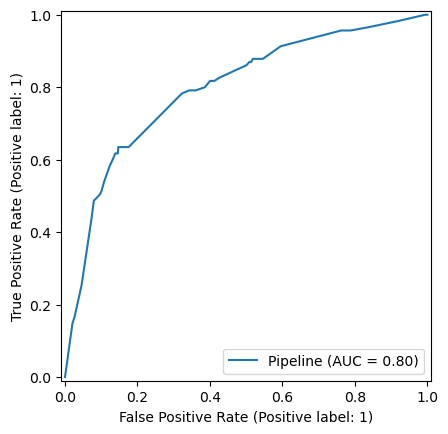

In [106]:
RocCurveDisplay.from_estimator(gscv.best_estimator_,X_test, y_test)

**Model Terbaik: XGBoost**  

Dari hasil hyperparameter tuning, model terbaik yang diperoleh adalah **XGBoost (Extreme Gradient Boosting)**. Model ini dipilih karena mampu meningkatkan recall hingga 63% pada data uji, sekaligus mempertahankan keseimbangan antara akurasi dan generalisasi model dalam memprediksi pelanggan yang berpotensi mengajukan klaim asuransi perjalanan.  

**Apa Itu XGBoost**  

XGBoost adalah algoritma **ensemble learning berbasis boosting** yang dirancang untuk meningkatkan akurasi prediksi dengan membangun serangkaian **pohon keputusan (decision trees)** secara bertahap.  

* **Ensemble Learning** → Menggabungkan beberapa model sederhana (weak learners) untuk membentuk model yang lebih kuat dan akurat.  
* **Boosting** → Teknik yang melatih model secara bertahap, di mana setiap model baru berusaha memperbaiki kesalahan prediksi yang dibuat oleh model sebelumnya.  

XGBoost merupakan salah satu metode boosting yang paling populer karena **lebih cepat, lebih efisien, dan memiliki mekanisme untuk menghindari overfitting** dibandingkan metode boosting lainnya seperti AdaBoost atau Gradient Boosting biasa.  

**Parameter XGBoost yang Digunakan**  

Berdasarkan tuning yang dilakukan, parameter terbaik yang dipilih adalah sebagai berikut:  

Berdasarkan tuning yang dilakukan, parameter terbaik yang dipilih adalah sebagai berikut:

* **n_estimators** = 100 → Menentukan jumlah total pohon dalam ensemble. Nilai ini memberikan keseimbangan antara performa dan kompleksitas model.
* **max_depth** = 3 → Menentukan kedalaman maksimum pohon keputusan. Nilai ini membatasi kompleksitas model untuk mencegah overfitting.
* **learning_rate** = 0.01 → Menentukan seberapa besar kontribusi dari setiap pohon baru terhadap model akhir. Nilai ini membuat pembelajaran lebih stabil dan mengurangi risiko overfitting.
* **eval_metric** = 'logloss' → Metode evaluasi yang digunakan adalah log loss, yang cocok untuk tugas klasifikasi biner.
* **random_state** = 2025 → Menjaga konsistensi hasil tuning agar eksperimen dapat direplikasi.

Selain parameter pada model XGBoost, **feature selection menggunakan SelectKBest dengan k=15** juga diterapkan untuk memilih **15 fitur terbaik** berdasarkan skor statistik f_classif, sehingga hanya fitur yang memiliki hubungan kuat dengan target yang digunakan dalam pelatihan model.  

**Cara Kerja XGBoost**  

XGBoost membangun model secara bertahap, di mana setiap model baru berusaha memperbaiki kesalahan model sebelumnya. Berikut langkah-langkah utama dalam cara kerja XGBoost:  

1. Membuat model awal  
   - Model pertama diprediksi secara sederhana, misalnya dengan mean (untuk regresi) atau tebakan awal (untuk klasifikasi).  

2. Menghitung residual (kesalahan prediksi)  
   - XGBoost menghitung selisih antara prediksi model dan nilai sebenarnya, yang disebut sebagai residual error.  

3. Membangun pohon baru untuk memprediksi residual  
   - Pohon keputusan baru dibuat untuk mencoba memprediksi residual yang dihasilkan oleh model sebelumnya.  

4. Menggabungkan model dengan learning rate  
   - Model baru ditambahkan ke model sebelumnya dengan faktor learning rate, yang mengontrol seberapa besar perubahan yang diadopsi oleh model.  

5. Mengulangi hingga model optimal  
   - Proses ini diulang sampai model tidak lagi menunjukkan peningkatan performa atau mencapai jumlah iterasi maksimum.  

**Kapan Menggunakan XGBoost**
- Dataset Besar dan Kompleks: XGBoost sangat efisien untuk dataset besar dengan banyak fitur.
- Perlu Akurasi Tinggi: XGBoost sering memberikan akurasi yang sangat baik dibandingkan model lain.







Berdasarkan hasil tuning pada GridSearchCV, XGBoost mendapat hasil terbaik dibanding model lain. Model ini dipilih berdasarkan kombinasi hyperparameter yang telah dioptimalkan, sehingga memberikan performa paling optimal dalam pemrosesan data yang digunakan. Dengan hasil ini, XGBoost menjadi model yang paling sesuai untuk diterapkan dalam prediksi klaim asuransi perjalanan.  


Model terbaik hasil hyperparameter tuning yang berupa XGBoost Classifier dalam pipeline yang mencakup Random Under Sampling, SelectKBest, dan berbagai teknik encoding. Model ini menunjukkan akurasi sebesar 82% pada data uji, dengan performa yang lebih konsisten dibandingkan model sebelumnya.

Selain itu, F2-score pada data train sebesar 0.28, sementara pada data uji sebesar 0.19, yang menunjukkan bahwa model tetap memiliki sedikit perbedaan performa antara data latih dan uji. Namun, dibandingkan model sebelum tuning, perbedaan ini lebih kecil, menandakan bahwa model telah lebih stabil dalam mengenali pola klaim.

Hasil ROC-AUC sebesar 0.80 menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan antara pelanggan yang akan mengajukan klaim dan yang tidak. Dengan performa ini, model dapat digunakan sebagai alat prediktif dalam pengambilan keputusan bisnis, khususnya dalam strategi manajemen risiko dan optimasi proses klaim dalam asuransi perjalanan.

## 4.3 Threshold Adjustment


In [110]:
model=best_model
model.fit(X_train,y_train)

th_value=[i/100 for i in range(1,99)]
score=0
score_list=[]

for i in th_value:
    y_prob=model.predict_proba(X_test)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp=fbeta_score(y_test,y_pred,beta=2)
    score_list.append(score_temp)

th_f2 = pd.DataFrame({
    'th_value':th_value,
    "f2_score":score_list
})

th_f2=th_f2.sort_values("f2_score",ascending=False)

In [111]:
th_f2

,th_value,f2_score
66,0.67,0.251799
68,0.69,0.251799
67,0.68,0.251799
65,0.66,0.251799
71,0.72,0.236967
...,...,...
79,0.80,0.000000
78,0.79,0.000000
77,0.78,0.000000
76,0.77,0.000000


In [112]:
th_f2.head(1)["th_value"].values

array([0.67])

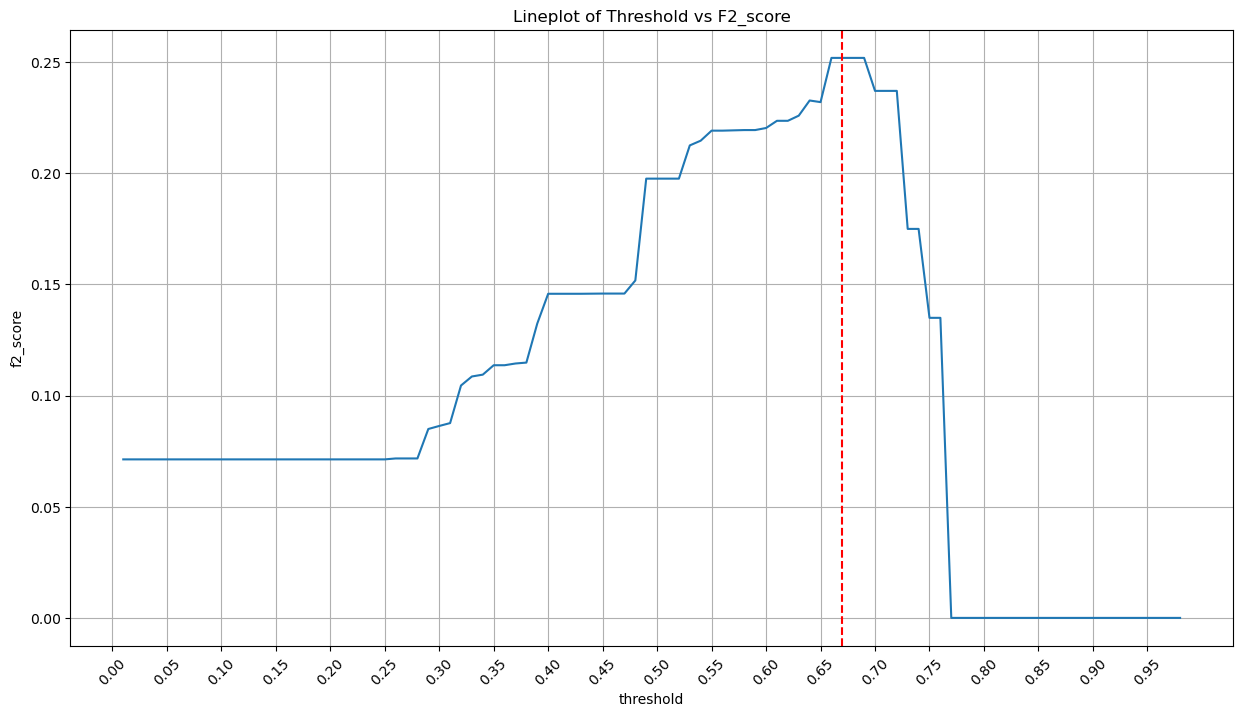

In [113]:
plt.figure(figsize=(15,8))
sns.lineplot(x=th_value,y=score_list)
plt.grid()
plt.xticks(np.arange(0,1,0.05),rotation=45)
plt.ylabel("f2_score")
plt.xlabel("threshold")
plt.title("Lineplot of Threshold vs F2_score")
plt.axvline(x=th_f2.head(1)["th_value"].values, linestyle='--',color='red')
plt.show()

In [114]:
y_prob=model.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>.67,1,0)

In [115]:
th_f2[th_f2['th_value'] == .67]

,th_value,f2_score
66,0.67,0.251799


In [116]:
final_model_actual_pred_y = pd.DataFrame({
    "actual":y_test,
    "pred":y_pred
})
final_model_actual_pred_y 

,actual,pred
33378,0,0
42762,0,0
33369,0,0
35601,0,0
13079,0,0
...,...,...
21629,0,0
23950,0,0
36068,0,0
22595,0,1


In [117]:
confusion_matrix_final= final_model_actual_pred_y.groupby("actual")["pred"].value_counts().reset_index()
confusion_matrix_final

,actual,pred,count
0,0,0,6896
1,0,1,596
2,1,0,59
3,1,1,56


In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      7492
           1       0.09      0.49      0.15       115

    accuracy                           0.91      7607
   macro avg       0.54      0.70      0.55      7607
weighted avg       0.98      0.91      0.94      7607



In [119]:
print(fbeta_score(y_test,y_pred,beta=2))

0.2517985611510791


In [120]:
pd.DataFrame(y_pred).value_counts()

0
0    6955
1     652
Name: count, dtype: int64

In [121]:
final_model = pd.DataFrame({
    "actual":y_test,
    "pred":y_pred
})
 

In [122]:
confusion_matrix_ML= final_model.groupby("actual")["pred"].value_counts().reset_index()

In [123]:
print("XGBoost Classifier:")
print(classification_report(y_test,y_pred))

print("F2-Score: ") 
print(fbeta_score(y_test,y_pred,beta=2))

display(confusion_matrix_ML.sort_values(by=["actual","pred"],ascending=[False,False]))


XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      7492
           1       0.09      0.49      0.15       115

    accuracy                           0.91      7607
   macro avg       0.54      0.70      0.55      7607
weighted avg       0.98      0.91      0.94      7607

F2-Score: 
0.2517985611510791


,actual,pred,count
3,1,1,56
2,1,0,59
1,0,1,596
0,0,0,6896


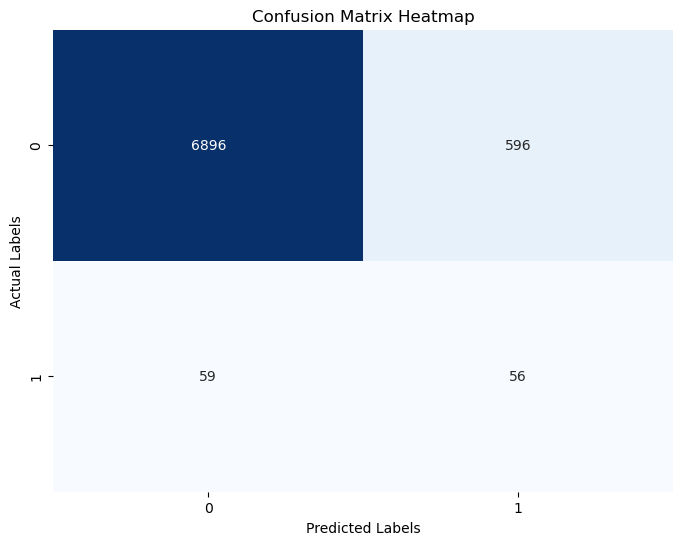

In [124]:
#  Pivot table untuk menghasilkan format confusion matrix
conf_matrix = confusion_matrix_final.pivot(index='actual', columns='pred', values='count').fillna(0)

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

# Menambahkan judul dan label
plt.title("Confusion Matrix Heatmap")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Tampilkan plot
plt.show()

Setelah dilakukan threshold adjustment, terjadi peningkatan F2-score menjadi 0.251799, dibandingkan sebelumnya yang hanya 0.1975108.  

Dari hasil Confusion Matrix, terlihat bahwa model kini lebih baik dalam mengidentifikasi pelanggan yang mengajukan klaim, dengan jumlah true positive meningkat menjadi 56 kasus. Selain itu, recall untuk kelas klaim meningkat menjadi 49%, menunjukkan bahwa model lebih sensitif dalam menangkap pola klaim yang sebelumnya sulit terdeteksi.  

Peningkatan ini membuat model lebih efektif dalam mendukung pengambilan keputusan, terutama dalam mengidentifikasi pelanggan yang benar-benar membutuhkan klaim, yang dapat membantu dalam strategi mitigasi risiko dan optimasi proses asuransi perjalanan.

## 4.4 Feature Evaluation

In [127]:
# Get the best estimator from GridSearchCV
best_estimator = gscv.best_estimator_

# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out()

# Transform X_train using the transformer
X_train_encoded = transformer.transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_train_encoded

,num__Duration,num__Net Sales,num__Commision (in value),num__Age,cat__Agency_ADM,cat__Agency_ART,cat__Agency_C2B,cat__Agency_CBH,cat__Agency_CCR,cat__Agency_CSR,...,cat__Distribution Channel_Offline,cat__Distribution Channel_Online,binary__Destination_0,binary__Destination_1,binary__Destination_2,binary__Destination_3,binary__Destination_4,binary__Destination_5,binary__Destination_6,binary__Destination_7
0,1.627907,-0.258065,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.418605,-0.483871,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.232558,0.161290,1.10,-1.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.581395,2.387097,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,7.930233,9.529032,20.02,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30420,-0.116279,2.709677,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30421,-0.348837,-0.580645,0.00,-1.222222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30422,-0.186047,-0.161290,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
30423,1.883721,0.225806,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [128]:
# Get the best estimator from GridSearchCV
best_estimator = gscv.best_estimator_

# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Transform X_train using the transformer
X_train_encoded = transformer.transform(X_train)

X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_train_encoded

,num__Duration,num__Net Sales,num__Commision (in value),num__Age,cat__Agency_ADM,cat__Agency_ART,cat__Agency_C2B,cat__Agency_CBH,cat__Agency_CCR,cat__Agency_CSR,...,cat__Distribution Channel_Offline,cat__Distribution Channel_Online,binary__Destination_0,binary__Destination_1,binary__Destination_2,binary__Destination_3,binary__Destination_4,binary__Destination_5,binary__Destination_6,binary__Destination_7
0,1.627907,-0.258065,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.418605,-0.483871,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.232558,0.161290,1.10,-1.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.581395,2.387097,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,7.930233,9.529032,20.02,0.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30420,-0.116279,2.709677,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30421,-0.348837,-0.580645,0.00,-1.222222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30422,-0.186047,-0.161290,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
30423,1.883721,0.225806,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [129]:
final_estimator = best_estimator.named_steps['classifier']

In [130]:
selected_features = best_estimator.named_steps['feature_selection'].get_support(indices=True)
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

In [131]:
test = feature_names[selected_features]

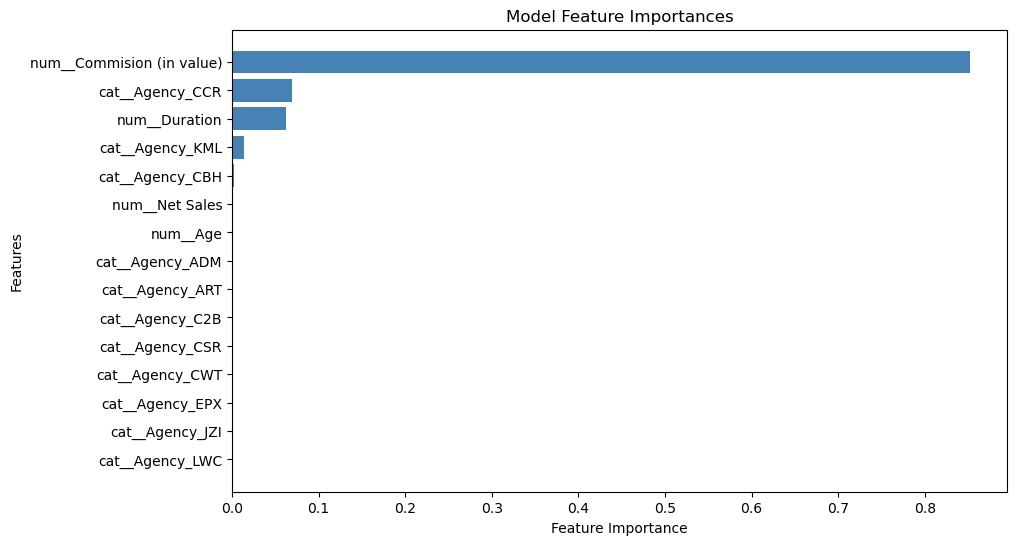


Top 10 Important Features:


,Feature,Importance
2,num__Commision (in value),0.852257
8,cat__Agency_CCR,0.068952
0,num__Duration,0.062508
13,cat__Agency_KML,0.013888
7,cat__Agency_CBH,0.002396
1,num__Net Sales,0.000000
3,num__Age,0.000000
4,cat__Agency_ADM,0.000000
5,cat__Agency_ART,0.000000
6,cat__Agency_C2B,0.000000


In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ambil model terbaik dari GridSearchCV
model_for_feature_importance = gscv.best_estimator_.named_steps["classifier"]

# Pastikan model memiliki atribut feature_importances_ (hanya untuk model tree-based)
if hasattr(model_for_feature_importance, "feature_importances_"):
    # Ambil preprocessor yang sudah di-fit dalam pipeline
    preprocessor = gscv.best_estimator_.named_steps["preprocessor"]
    
    # Transformasi data untuk mendapatkan nama fitur setelah encoding
    feature_names = preprocessor.get_feature_names_out()

    # Ambil nilai feature importance dari model
    feature_importance = model_for_feature_importance.feature_importances_

    # Pastikan panjang feature_names dan feature_importance sama
    min_length = min(len(feature_names), len(feature_importance))
    feature_names = feature_names[:min_length]
    feature_importance = feature_importance[:min_length]

    # Buat DataFrame untuk menyimpan hasil
    feature_importance_df = pd.DataFrame(
        zip(feature_names, feature_importance), 
        columns=["Feature", "Importance"]
    )

    # Urutkan berdasarkan kepentingan fitur
    feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="steelblue")
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Model Feature Importances")
    plt.gca().invert_yaxis()  # Membalik sumbu agar fitur terpenting di atas
    plt.show()
    
    # Tampilkan 10 fitur teratas
    print("\nTop 10 Important Features:")
    display(feature_importance_df.head(10))


 98%|===================| 29733/30425 [00:38<00:00]        

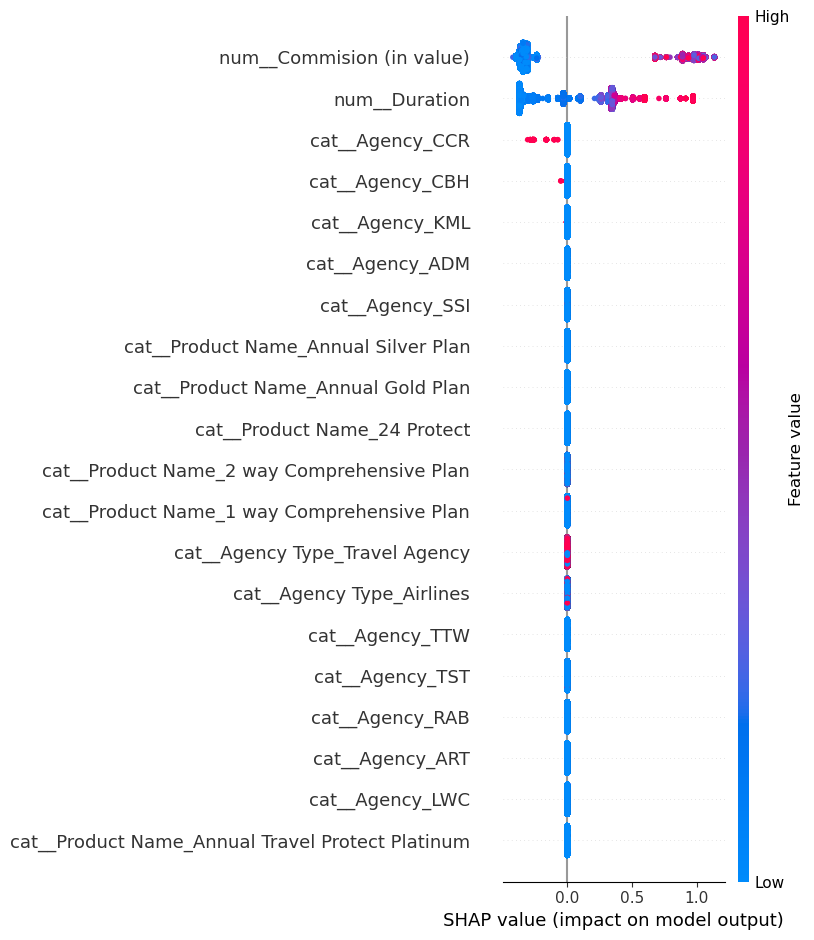

Top 10 Important Features:


,Feature,Mean |SHAP Value|
2,num__Commision (in value),0.493165
0,num__Duration,0.330466
8,cat__Agency_CCR,0.000544
7,cat__Agency_CBH,0.000020
13,cat__Agency_KML,0.000009
33,cat__Product Name_Comprehensive Plan,0.000000
34,cat__Product Name_Gold Plan,0.000000
35,cat__Product Name_Individual Comprehensive Plan,0.000000
36,cat__Product Name_Premier Plan,0.000000
44,cat__Product Name_Travel Cruise Protect,0.000000


In [133]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Gunakan preprocessor yang sudah di-fit dalam GridSearchCV
preprocessor = gscv.best_estimator_.named_steps["preprocessor"]

# Transform X_train dan X_test menggunakan preprocessor yang sudah di-fit
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Ambil nama fitur setelah transformasi
feature_names = preprocessor.get_feature_names_out()

# Konversi hasil transformasi ke DataFrame
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names)

# Ambil model XGBoost terbaik dari GridSearchCV
best_xgb_model = gscv.best_estimator_.named_steps["classifier"]

# Pastikan model sudah terlatih sebelum SHAP
explainer = shap.Explainer(best_xgb_model, X_train_processed)

# Hitung SHAP values
shap_values = explainer(X_train_processed)

# Plot summary SHAP
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_train_processed)
plt.show()

# Hitung rata-rata absolute SHAP value per fitur
shap_importance = pd.DataFrame({
    'Feature': feature_names,
    'Mean |SHAP Value|': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean |SHAP Value|', ascending=False)

# Tampilkan 10 fitur paling penting berdasarkan SHAP
print("Top 10 Important Features:")
display(shap_importance.head(10))


In [134]:
train = X_train.join(y_train).sort_index()
train

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
5,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,0
...,...,...,...,...,...,...,...,...,...,...
44322,EPX,Travel Agency,Online,2 way Comprehensive Plan,6,THAILAND,40.0,0.00,36,0
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


In [135]:
test = X_test.join(y_test).sort_index()
test

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
9,EPX,Travel Agency,Online,Cancellation Plan,24,GERMANY,80.0,0.00,36,0
17,EPX,Travel Agency,Online,Cancellation Plan,27,SINGAPORE,10.0,0.00,51,0
19,EPX,Travel Agency,Online,2 way Comprehensive Plan,3,MALAYSIA,20.0,0.00,65,0
52,EPX,Travel Agency,Online,Cancellation Plan,25,POLAND,34.0,0.00,36,0
...,...,...,...,...,...,...,...,...,...,...
44292,EPX,Travel Agency,Online,Cancellation Plan,4,INDIA,62.0,0.00,36,0
44302,C2B,Airlines,Online,Bronze Plan,51,SINGAPORE,47.0,11.75,39,0
44304,EPX,Travel Agency,Online,2 way Comprehensive Plan,55,INDONESIA,35.0,0.00,36,0
44310,C2B,Airlines,Online,Silver Plan,16,SINGAPORE,58.0,14.50,37,0


Berdasarkan analisis Feature Importance dan SHAP Value, berikut merupakan insight yang didapat:

Feature Importance
Berdasarkan gambar pertama, nilai Feature Importance untuk beberapa fitur yang signifikan adalah:

- num__Commision (in value): 0.852257
- cat_Agency_CCR: 0.068952
- num_Duration: 0.062508
- cat_Agency_KML: 0.013883
- cat_Agency_CBH: 0.002396
  
Fitur num__Commision (in value) menunjukkan kontribusi yang paling besar terhadap model dengan nilai 0.852257. cat_Agency_CCR dan num_Duration juga memberikan kontribusi penting, meskipun lebih kecil.

SHAP Value
Berdasarkan gambar ketiga, nilai SHAP Value rata-rata untuk beberapa fitur adalah:

- num__Commision (in value): 0.493165
- num_Duration: 0.330466
- cat_Agency_CCR: 0.000544
- cat_Agency_CBH: 0.000020
- cat_Agency_KML: 0.000009
  
Dalam hal SHAP Value, num__Commision (in value) juga mendominasi dengan nilai 0.493165, yang menunjukkan dampak yang sangat besar terhadap prediksi model. Sementara cat_Agency_CCR tetap berkontribusi lebih besar dibandingkan dengan fitur lainnya, seperti cat_Agency_CBH dan cat_Agency_KML, yang memiliki kontribusi minimal.

Secara keseluruhan, baik Feature Importance maupun SHAP Value menunjukkan bahwa num__Commision (in value) adalah fitur yang paling berpengaruh dalam model, diikuti oleh cat_Agency_CCR dan num_Duration.

## 4.5 Compare Againts Rule Base

Metode Zillmer digunakan sebagai rule-based approach dalam data ini karena pendekatannya yang tetap dan berbasis formula aktuaria dalam menghitung risiko klaim asuransi perjalanan. Metode ini menentukan estimasi cadangan berdasarkan aturan yang mempertimbangkan Net Sales, Commision (in value), dan claim ratio, tanpa mempertimbangkan pola historis klaim atau faktor dinamis lainnya. Pendekatan ini membuat metode Zillmer bekerja dengan aturan tetap yang tidak bergantung pada data aktual, sehingga digunakan sebagai pembanding dengan model prediktif yang lebih adaptif terhadap pola klaim

In [139]:
X_test_rule_based = X_test.copy()

In [140]:
# Metode Zillmer
def zillmer_reserve(net_sales, commission, claim_ratio):
    """
    Menghitung cadangan premi menggunakan metode Zillmer.
    :param net_sales: Jumlah penjualan bersih
    :param commission: Komisi yang diterima
    :param claim_ratio: Rasio klaim historis
    :return: Cadangan premi
    """
    return (net_sales - commission) * claim_ratio

# Hitung cadangan premi untuk setiap polis
claim_ratio = 0.015 # Sesuai dengan rasio claim historis (terdapat di awal notebook) 
X_test_rule_based['Zillmer Reserve'] = X_test_rule_based.apply(lambda row: zillmer_reserve(row['Net Sales'], row['Commision (in value)'], claim_ratio), axis=1)

# Prediksi klaim berdasarkan cadangan premi
# Asumsi: Jika cadangan > threshold, prediksi klaim (1), else 0
threshold_zillmer = X_test_rule_based['Zillmer Reserve'].median()  # Threshold berdasarkan median

X_test_rule_based['Predicted Claim (Zillmer)'] = np.where(X_test_rule_based['Zillmer Reserve'] > threshold_zillmer, 1, 0)


In [141]:
print("Classification Report (Zillmer):")
print(classification_report(y_test, X_test_rule_based['Predicted Claim (Zillmer)']))


Classification Report (Zillmer):
              precision    recall  f1-score   support

           0       0.99      0.52      0.68      7492
           1       0.02      0.63      0.04       115

    accuracy                           0.52      7607
   macro avg       0.50      0.57      0.36      7607
weighted avg       0.97      0.52      0.67      7607



In [142]:
print("Classification Report (Zillmer):")
print(fbeta_score(y_test, X_test_rule_based['Predicted Claim (Zillmer)'], beta=2))

Classification Report (Zillmer):
0.08664259927797834


In [143]:
cm_zillmer = confusion_matrix(y_test, X_test_rule_based['Predicted Claim (Zillmer)'])

In [144]:
y_test_pred = best_estimator.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)


In [145]:
def calculate_financial_loss(cm_zillmer, cm_your_model, cost_fp=500000, cost_fn=2500000):    
    fp_zillmer, fn_zillmer = cm_zillmer[0, 1], cm_zillmer[1, 0]
    fp_your_model, fn_your_model = cm_your_model[0, 1], cm_your_model[1, 0]
    
    loss_zillmer = (fp_zillmer * cost_fp) + (fn_zillmer * cost_fn)
    loss_your_model = (fp_your_model * cost_fp) + (fn_your_model * cost_fn)
    
    data = {
        "Metode": ["Zillmer", "Menggunakan Model"],
        "Total Kerugian": [loss_zillmer, loss_your_model],
        "Perbandingan": [
            f"{loss_zillmer / loss_your_model:.2f}× lebih buruk",
            "Paling Optimal"
        ]
    }
    
    df = pd.DataFrame(data)
    return df

In [146]:
calculate_financial_loss(cm_zillmer, cm_test)

,Metode,Total Kerugian,Perbandingan
0,Zillmer,1919000000,2.52× lebih buruk
1,Menggunakan Model,762500000,Paling Optimal


Hasil ini menunjukkan bahwa model yang dibuat memiliki performa yang jauh lebih baik dibandingkan metode Zillmer dalam memprediksi klaim asuransi perjalanan.  

Metode Zillmer hanya mencapai F2-score sebesar 0.0866, yang menandakan ketidakmampuannya dalam menangkap pola klaim dengan baik. Sebaliknya, model yang dibuat mampu meningkatkan metrik evaluasi secara signifikan, menunjukkan bahwa pendekatan berbasis machine learning lebih efektif dalam mengidentifikasi klaim yang benar-benar terjadi.  

Selain itu, dalam hal total kerugian, metode Zillmer menghasilkan Rp 1.919.000.000, yang 2.52x lebih buruk dibandingkan dengan model yang dibuat. Model yang telah dioptimalkan hanya menghasilkan total kerugian Rp 762.500.000, membuktikan bahwa pendekatan yang digunakan lebih efisien dalam mengurangi risiko keuangan.  

Maka dari itu, model yang telah dibuat memiliki performa yang lebih unggul dibandingkan metode Zillmer, baik dalam hal akurasi prediksi maupun dalam menekan kerugian finansial, menjadikannya solusi yang lebih optimal untuk mengelola klaim asuransi perjalanan.

## 4.6 Model Constraint

In [149]:
train.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,30425.000000,30425.000000,30425.000000,30425.000000,30425.000000
mean,43.292358,37.851885,8.853391,38.970715,0.015119
std,55.928433,39.503929,17.065147,10.434504,0.122029
min,0.000000,-357.500000,0.000000,0.000000,0.000000
25%,10.000000,18.000000,0.000000,35.000000,0.000000
50%,24.000000,28.000000,0.000000,36.000000,0.000000
75%,53.000000,49.000000,10.500000,44.000000,0.000000
max,365.000000,682.000000,262.760000,88.000000,1.000000


In [150]:
pd.set_option('display.max_colwidth', None)


columns = train.select_dtypes(exclude='number').columns
values = []
nunique_list = []
for i in columns:
    value = train[i].unique()
    nunique = train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

,columns,values,nunique
0,Agency,"[C2B, JZI, EPX, CWT, LWC, ART, CSR, RAB, KML, SSI, TST, ADM, CCR, CBH, TTW]",15
1,Agency Type,"[Airlines, Travel Agency]",2
2,Distribution Channel,"[Online, Offline]",2
3,Product Name,"[Annual Silver Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, Cancellation Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Gold Plan, Single Trip Travel Protect Silver, Premier Plan, Single Trip Travel Protect Platinum, Annual Gold Plan, Annual Travel Protect Gold, Annual Travel Protect Silver, Individual Comprehensive Plan, Annual Travel Protect Platinum, Travel Cruise Protect Family, Child Comprehensive Plan, Spouse or Parents Comprehensive Plan]",26
4,Destination,"[SINGAPORE, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, JAPAN, INDONESIA, MALAYSIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, CANADA, PHILIPPINES, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, KENYA, MYANMAR, FRANCE, GERMANY, RUSSIAN FEDERATION, ARGENTINA, POLAND, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, GREECE, QATAR, CZECH REPUBLIC, NORWAY, LUXEMBOURG, MALTA, PAKISTAN, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, LAO PEOPLE'S DEMOCRATIC REPUBLIC, CAYMAN ISLANDS, PANAMA, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, BANGLADESH, OMAN, JORDAN, MALI, CYPRUS, MAURITIUS, KUWAIT, AZERBAIJAN, BAHRAIN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, KAZAKHSTAN, LEBANON, CHILE, FIJI, PAPUA NEW GUINEA, FRENCH POLYNESIA, NIGERIA, GEORGIA, SLOVENIA, COLOMBIA, ZIMBABWE, NAMIBIA, BULGARIA, BERMUDA, ...]",131


In [151]:
train['Destination'].unique()

array(['SINGAPORE', 'INDIA', 'UNITED STATES', 'KOREA, REPUBLIC OF',
       'THAILAND', 'JAPAN', 'INDONESIA', 'MALAYSIA', 'VIET NAM',
       'AUSTRALIA', 'FINLAND', 'UNITED KINGDOM', 'SRI LANKA', 'SPAIN',
       'HONG KONG', 'MACAO', 'CHINA', 'UNITED ARAB EMIRATES',
       'IRAN, ISLAMIC REPUBLIC OF', 'TAIWAN, PROVINCE OF CHINA', 'CANADA',
       'PHILIPPINES', 'BELGIUM', 'TURKEY', 'BRUNEI DARUSSALAM', 'DENMARK',
       'SWITZERLAND', 'NETHERLANDS', 'SWEDEN', 'KENYA', 'MYANMAR',
       'FRANCE', 'GERMANY', 'RUSSIAN FEDERATION', 'ARGENTINA', 'POLAND',
       'TANZANIA, UNITED REPUBLIC OF', 'SERBIA', 'ITALY', 'CROATIA',
       'NEW ZEALAND', 'PERU', 'MONGOLIA', 'CAMBODIA', 'GREECE', 'QATAR',
       'CZECH REPUBLIC', 'NORWAY', 'LUXEMBOURG', 'MALTA', 'PAKISTAN',
       'ISRAEL', 'SAUDI ARABIA', 'AUSTRIA', 'PORTUGAL', 'NEPAL',
       'UKRAINE', 'ESTONIA', 'ICELAND', 'BRAZIL', 'MEXICO',
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'CAYMAN ISLANDS', 'PANAMA',
       'TUNISIA', 'IRELAND', 'ETHIOP


**Model hanya dapat bekerja dengan baik jika data yang diuji memenuhi kriteria berikut:**

| **Kriteria**           | **Rentang Nilai**       | **Nilai yang Diperbolehkan**                                                                 |
|------------------------|------------------------|---------------------------------------------------------------------------------------------|
| **Duration**          | 0 – 365                | -                                                                                           |
| **Net Sales**         | -357.5 – 682           | -                                                                                           |
| **Commision (in value)** | 0 – 262.76            | -                                                                                           |
| **Age**               | 0 – 88                 | -                                                                                           |
| **Agency**           | -                        | C2B, JZI, EPX, CWT, LWC, ART, CSR, RAB, KML, SSI, TST, ADM, CCR, CBH, TTW                  |
| **Agency Type**      | -                        | Airlines, Travel Agency                                                                    |
| **Distribution Channel** | -                     | Online, Offline                                                                           |
| **Product Name**     | -                        | Annual Silver Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, Cancellation Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Gold Plan, Single Trip Travel Protect Silver, Premier Plan, Single Trip Travel Protect Platinum, Annual Gold Plan, Annual Travel Protect Gold, Annual Travel Protect Silver, Individual Comprehensive Plan, Annual Travel Protect Platinum, Travel Cruise Protect Family, Child Comprehensive Plan, Spouse or Parents Comprehensive Plan |
| **Destination**      | -                        | SINGAPORE, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, JAPAN, INDONESIA, MALAYSIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, CANADA, PHILIPPINES, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, KENYA, MYANMAR, FRANCE, GERMANY, RUSSIAN FEDERATION, ARGENTINA, POLAND, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, GREECE, QATAR, CZECH REPUBLIC, NORWAY, LUXEMBOURG, MALTA, PAKISTAN, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, LAO PEOPLE'S DEMOCRATIC REPUBLIC, CAYMAN ISLANDS, PANAMA, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, BANGLADESH, OMAN, JORDAN, MALI, CYPRUS, MAURITIUS, KUWAIT, AZERBAIJAN, BAHRAIN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, KAZAKHSTAN, LEBANON, CHILE, FIJI, PAPUA NEW GUINEA, FRENCH POLYNESIA, NIGERIA, GEORGIA, SLOVENIA, COLOMBIA, ZIMBABWE, NAMIBIA, BULGARIA, BERMUDA, URUGUAY, GUINEA, VANUATU, EGYPT, GHANA, GUAM, UGANDA, BOLIVIA, JAMAICA, LATVIA, REPUBLIC OF MONTENEGRO, KYRGYZSTAN, GUADELOUPE, ZAMBIA, RWANDA, BOTSWANA, ROMANIA, GUYANA, LITHUANIA, GUINEA-BISSAU, COSTA RICA, SENEGAL, CAMEROON, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, SAMOA, PUERTO RICO, TAJIKISTAN, ARMENIA, DOMINICAN REPUBLIC, MOLDOVA, REPUBLIC OF, REUNION |


# 5. Conclusion & Reccomendation

## 5.1 Conclusion

Model XGBoost dengan hyperparameter tuning dan threshold adjustment menunjukkan performa yang lebih baik dalam memprediksi klaim asuransi perjalanan dibandingkan dengan metode **Zillmer**. Hal ini terlihat dari peningkatan F2-score dari 0.1975 menjadi 0.2518 setelah dilakukan threshold adjustment. Model ini memiliki akurasi yang tinggi sebesar 91% dengan nilai F1-Score yang sangat baik untuk kelas mayoritas (0), dan meskipun lebih rendah untuk kelas minoritas (1), model ini berhasil memperbaiki recall untuk claim.

**Metode Zillmer** menghasilkan total kerugian sebesar **Rp 1.919.000.000**, yang **2.52x lebih buruk** dibandingkan dengan model XGBoost. Sementara itu, **menggunakan Model XGBoost** menghasilkan total kerugian yang lebih rendah, yaitu **Rp 762.500.000**, yang dianggap **paling optimal** di antara keduanya.

Peningkatan ini menunjukkan bahwa model XGBoost lebih efektif dalam mengidentifikasi pelanggan yang berpotensi mengajukan klaim, dengan true positive untuk klaim meningkat. Selain itu, recall untuk kelas klaim juga menunjukkan perbaikan, yang membuat model lebih sensitif dalam menangkap pola klaim yang sulit terdeteksi.

Hasil ini berdampak pada peningkatan performa bisnis, dimana model ini dapat digunakan untuk mendukung pengambilan keputusan yang lebih tepat dalam pengelolaan risiko dan optimasi proses asuransi perjalanan. Model ini memberikan alat yang efektif untuk memitigasi risiko klaim yang tidak terdeteksi sebelumnya, serta meningkatkan efisiensi proses asuransi secara keseluruhan.

## 5.2 Business Reccomendation

Model Klasifikasi XGBoost yang telah disusun dapat menjadi alat yang efektif bagi tim pengembangan bisnis untuk memprediksi klaim asuransi perjalanan. Dengan menggunakan model ini sebagai panduan, diharapkan tim dapat mengidentifikasi pelanggan yang berpotensi mengajukan klaim lebih tepat dan lebih efisien. Melalui hasil prediksi yang lebih akurat, tim dapat mengoptimalkan proses klaim asuransi dan meningkatkan kepuasan pelanggan.

Berdasarkan hasil model XGBoost yang dipilih, beberapa faktor yang paling mempengaruhi kemampuan model dalam memprediksi klaim asuransi perjalanan telah diidentifikasi sebagai berikut:

1. **Komisi yang Diterima oleh Agen**  
   Fitur **num__Commision (in value)** menunjukkan kontribusi yang sangat besar terhadap model. Hal ini menunjukkan bahwa agen dengan komisi yang lebih tinggi memiliki potensi lebih besar untuk menghasilkan klaim, yang dapat membantu tim dalam memprioritaskan pengawasan terhadap agen-agen tersebut.

2. **Durasi Kontrak dan Lama Hubungan Pelanggan**  
   Durasi yang lebih panjang dalam hubungan dengan pelanggan menunjukkan kecenderungan yang lebih tinggi untuk mengajukan klaim. Model dapat membantu mengidentifikasi pelanggan yang lebih lama berhubungan dengan perusahaan asuransi, yang berisiko lebih besar dalam hal klaim.

3. **Kategori Agen**  
   Fitur seperti **cat_Agency_CCR** dan **cat_Agency_KML** mempengaruhi tingkat keberhasilan model dalam mengidentifikasi klaim. Oleh karena itu, penting bagi tim untuk memantau kinerja agen di kategori tersebut dan memastikan mereka memberikan pelayanan yang optimal.

4. **Peningkatan Akurasi dalam Menangkap Klaim**  
   Model ini dapat meningkatkan akurasi dalam menangkap klaim yang sulit terdeteksi sebelumnya. Dengan ini, perusahaan dapat mengurangi risiko kerugian yang diakibatkan oleh klaim yang tidak terdeteksi, serta meningkatkan manajemen risiko.

5. **Strategi Pengelolaan Klaim yang Lebih Efisien**  
   Berdasarkan prediksi yang lebih tepat, perusahaan dapat merancang strategi mitigasi klaim yang lebih efisien dan cepat, sehingga meningkatkan pengalaman pelanggan dan mengurangi biaya operasional yang terkait dengan klaim asuransi.

Dengan menerapkan model XGBoost ini, tim bisnis dapat meningkatkan prediksi klaim, mengoptimalkan pengelolaan risiko, dan meningkatkan efisiensi proses asuransi perjalanan, yang pada akhirnya akan mendukung pertumbuhan bisnis yang berkelanjutan.

## 5.3 Model Improvement Recommendation

Data yang digunakan sangat penting untuk meningkatkan kinerja model. Oleh karena itu, untuk model klaim asuransi perjalanan berikutnya, tim pengembangan disarankan untuk memasukkan data lebih rinci ke dalam sistem. Sebagai contoh, memasukkan lebih banyak fitur terkait profil pelanggan atau rincian transaksi klaim yang lebih spesifik. Dengan cara ini, model dapat belajar lebih efektif dari data yang ada, yang pada akhirnya akan meningkatkan akurasi dalam memprediksi klaim asuransi perjalanan.

Selain itu, dapat dicoba untuk mengatur hyperparameter tuning model dengan pendekatan yang lebih mendalam, yang memungkinkan eksplorasi lebih luas terhadap parameter yang dapat menghasilkan performa lebih optimal. Saat ini, model masih terpengaruh oleh keterbatasan waktu proses atau running time, yang membatasi pencarian parameter terbaik. Dengan meningkatkan durasi pelatihan atau kapasitas sistem, model dapat mengeksplorasi lebih banyak kombinasi parameter dan memberikan hasil yang lebih baik.

Penting juga untuk terus mengevaluasi dan menguji model dengan variasi yang berbeda guna menemukan konfigurasi terbaik yang dapat meningkatkan f2-score, sehingga prediksi klaim asuransi lebih akurat dan efektif.

# Fit Final Model & Saving


In [242]:
#Concat train and test features data
data_final_model_X = pd.concat([X_train,X_test])
data_final_model_X

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
29627,EPX,Travel Agency,Online,2 way Comprehensive Plan,94,INDONESIA,20.0,0.00,36
6788,EPX,Travel Agency,Online,Cancellation Plan,6,SINGAPORE,13.0,0.00,36
23733,JZI,Airlines,Online,Basic Plan,14,INDONESIA,33.0,11.55,23
21480,EPX,Travel Agency,Online,2 way Comprehensive Plan,49,UNITED KINGDOM,102.0,0.00,36
7889,LWC,Travel Agency,Online,Annual Travel Protect Platinum,365,UNITED STATES,323.4,210.21,40
...,...,...,...,...,...,...,...,...,...
21629,JZI,Airlines,Online,Basic Plan,43,HONG KONG,26.0,9.10,41
23950,EPX,Travel Agency,Online,2 way Comprehensive Plan,13,THAILAND,20.0,0.00,27
36068,EPX,Travel Agency,Online,Cancellation Plan,2,MALAYSIA,10.0,0.00,65
22595,C2B,Airlines,Online,Bronze Plan,16,SINGAPORE,39.0,9.75,25


In [244]:
#Concat train and test label data
data_final_model_y = pd.concat([y_train,y_test])
data_final_model_y

29627    0
6788     0
23733    0
21480    0
7889     0
        ..
21629    0
23950    0
36068    0
22595    0
5124     0
Name: Claim, Length: 38032, dtype: int32

In [246]:
# Get the best estimator from GridSearchCV
best_estimator = best_model

#Fit model ke fitur data train dan test yang sudah disatukan dan label data train dan test yang telah disatukan
best_estimator.fit(data_final_model_X,data_final_model_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Duration', 'Net Sales',
                                                   'Commision (in value)',
                                                   'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Agency', 'Agency Type',
                                                   'Product Name',
                                                   'Distribution Channel']),
                                                 ('binary',
                                                  Pipeline(steps=[(...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=2025, ...))])

In [248]:
import pickle


In [250]:
#Saving models

filename = 'Model Final Travel Insurance.sav'

## Uncomment code dibawah untuk saving file model

# pickle.dump(best_estimator,open(filename,'wb'))